In [67]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import r2_score

In [68]:
# Reading Biking dataset
bike_df=pd.read_csv('day.csv')

In [69]:
bike_df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [70]:
#Checking metadata and summary
bike_df.shape

(730, 16)

In [71]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [72]:

bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [73]:
#Check unique values of cateogrical variables
bike_df.season.unique()# spring ,summer, fall, winter
bike_df.yr.unique()#0 2018 ,1 2019
bike_df.mnth.unique()# 1-12 Jan-Dec
bike_df.holiday.unique()# 0 no holiday, 1 holiday
bike_df.weekday.unique()# 0 Sunday to 6 Saturday
bike_df.workingday.unique()# 1 yes, 0 no
bike_df.weathersit.unique()# 1 Cloud, 2 Mist, 3 Light snow/rain

array([2, 1, 3], dtype=int64)

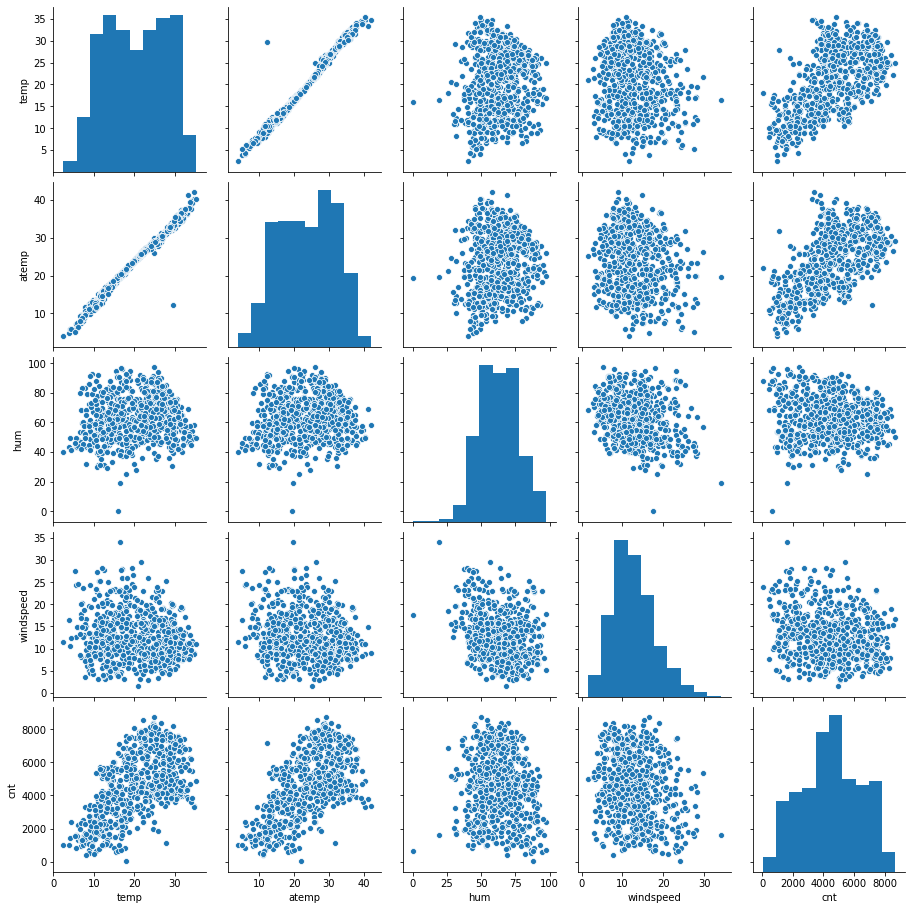

In [74]:
#create pairplots
num_var=['temp','atemp','hum','windspeed','cnt']
sns.pairplot(bike_df[num_var])

#We can observe that fields "temp"/"atemp"are positively correlated to "cnt", 
#hence a linear regression model building should be possible

[Text(0.5, 1.0, 'Weather vs Count')]

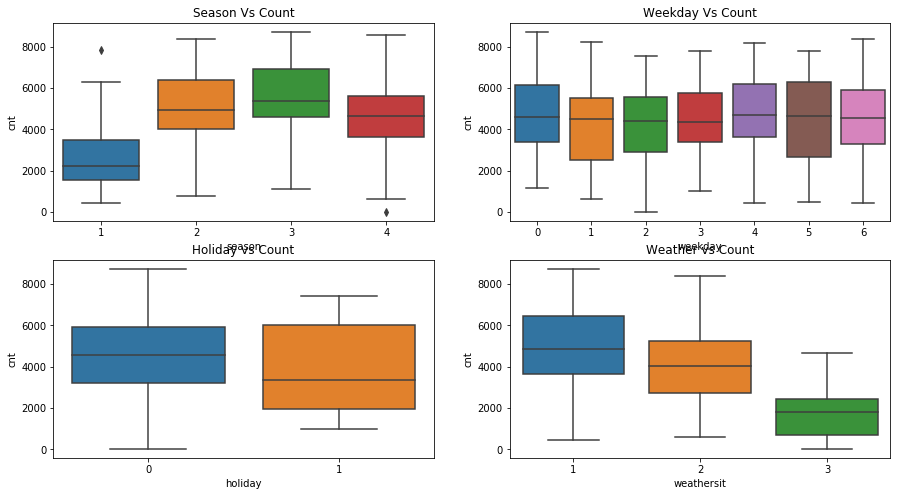

In [75]:
#Visualising Categorical variables using boxplots
f1, axes1 = plt.subplots(2, 2,figsize=(15,8))



sns.boxplot(y="cnt",x="season",data=bike_df,orient='v',ax=axes1[0,0])
sns.boxplot(y="cnt",x="weekday",data=bike_df,orient='v',ax=axes1[0,1])
sns.boxplot(y="cnt",x="holiday",data=bike_df,orient='v',ax=axes1[1,0])
#sns.boxplot(y="cnt",x="workingday",data=bike_df,orient='v',ax=axes1[1,0])
sns.boxplot(y="cnt",x="weathersit",data=bike_df,orient='v',ax=axes1[1,1])


axes1[0,0].set(title='Season Vs Count')
axes1[0,1].set(title='Weekday Vs Count')
axes1[1,0].set(title='Holiday vs Count')
axes1[1,1].set(title='Weather vs Count')

# We can observe that Summer and Fall season are definitely having higher counts. Spring having the lowest median.
# Assumption was that on Saturday Sunday the counts would be relatively higher, but it does not appears to be the case.
# All days appear to have similar medians, although Friday has relatively greater spread.
# Non Holiday days show higher median, which might be that people use it for daily commutes as compared to Holidays when
# people only do for leisure
# Cloudy days show a significant higher count as compared to Mist/ Rain/ or Snow weather

In [76]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [77]:
df=bike_df.copy(deep=True)

In [78]:
# Converting and encoding categorical variables.
def Season(a):
    if a==1:
        return 'Spring'
    elif a==2:
        return 'Summer'
    elif a==3:
        return 'Fall'
    elif a==4:
        return 'Winter'
    else:
        return ''
def Weather(a):
    if a==1:
        return 'Cloud'
    elif a==2:
        return 'Mist'
    elif a==3:
        return 'Snow_Rain'
    else:
        return ''
def MonthMap(a):
    if a==1:
        return 'January'
    elif a==2:
        return 'February'
    elif a==3:
        return 'March'
    elif a==4:
        return 'April'
    elif a==5:
        return 'May'
    elif a==6:
        return 'June'
    elif a==7:
        return 'July'
    elif a==8:
        return 'August'
    elif a==9:
        return 'September'
    elif a==10:
        return 'October'
    elif a==11:
        return 'November'
    elif a==12:
        return 'December'
    else:
        return ''

def WeekDay(a):
    if a==0:
        return 'Sunday'
    elif a==1:
        return 'Monday'
    elif a==2:
        return 'Tuesday'
    elif a==3:
        return 'Wednesday'
    elif a==4:
        return 'Thursday'
    elif a==5:
        return 'Friday'
    elif a==6:
        return 'Saturday'
    else:
        return ''
df['season']=df['season'].apply(lambda x: Season(x))
df['weathersit']=df['weathersit'].apply(lambda x: Weather(x))
df['weekday']=df['weekday'].apply(lambda x: WeekDay(x))
df['mnth']=df['mnth'].apply(lambda x: MonthMap(x))

In [79]:
df.drop(columns=['casual','registered'], inplace=True)

In [80]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,01-01-2018,Spring,0,January,0,Monday,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,2,02-01-2018,Spring,0,January,0,Tuesday,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,3,03-01-2018,Spring,0,January,0,Wednesday,1,Cloud,8.050924,9.47025,43.7273,16.636703,1349
3,4,04-01-2018,Spring,0,January,0,Thursday,1,Cloud,8.200000,10.60610,59.0435,10.739832,1562
4,5,05-01-2018,Spring,0,January,0,Friday,1,Cloud,9.305237,11.46350,43.6957,12.522300,1600


In [81]:
#Creating dummy categorical variables
df=pd.concat([df,pd.get_dummies(df['season'],drop_first=True),
              pd.get_dummies(df['mnth'],drop_first=True),
              pd.get_dummies(df['weekday'],drop_first=True),
              pd.get_dummies(df['weathersit'],drop_first=True)],axis=1).drop(['mnth','season','weekday','weathersit','instant','dteday'],axis=1)

In [82]:
# Rounding continuos variables to 2 decimals
cont_var=['temp','atemp','hum','windspeed']
df[cont_var]=df[cont_var].apply(lambda x:round(x,2))

In [83]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Mist,Snow_Rain
0,0,0,1,14.11,18.18,80.58,10.75,985,1,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.90,17.69,69.61,16.65,801,1,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.05,9.47,43.73,16.64,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.20,10.61,59.04,10.74,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.31,11.46,43.70,12.52,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
# Train and Test Split
df_train,df_test=train_test_split(df,train_size=0.7,random_state=100)

In [85]:
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


In [86]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'Spring', 'Summer', 'Winter', 'August', 'December', 'February',
       'January', 'July', 'June', 'March', 'May', 'November', 'October',
       'September', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'Mist', 'Snow_Rain'],
      dtype='object')

In [87]:
# Scaling Training data set
scaler=MinMaxScaler()
# Variables to scale
var1=['temp','atemp','hum','windspeed','cnt']
df_train[var1]=scaler.fit_transform(df_train[var1])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Mist,Snow_Rain
576,1,0,1,0.815254,0.766343,0.725680,0.264678,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442419,0.438960,0.640148,0.255374,0.465255,1,0,...,0,0,0,0,1,0,0,0,1,0
728,1,0,1,0.245214,0.200315,0.498042,0.663138,0.204096,1,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395624,0.391966,0.504534,0.188643,0.482973,0,1,...,0,0,0,0,1,0,0,0,1,0
111,0,0,0,0.345792,0.318981,0.751855,0.381136,0.191095,0,1,...,0,0,0,0,1,0,0,0,1,0


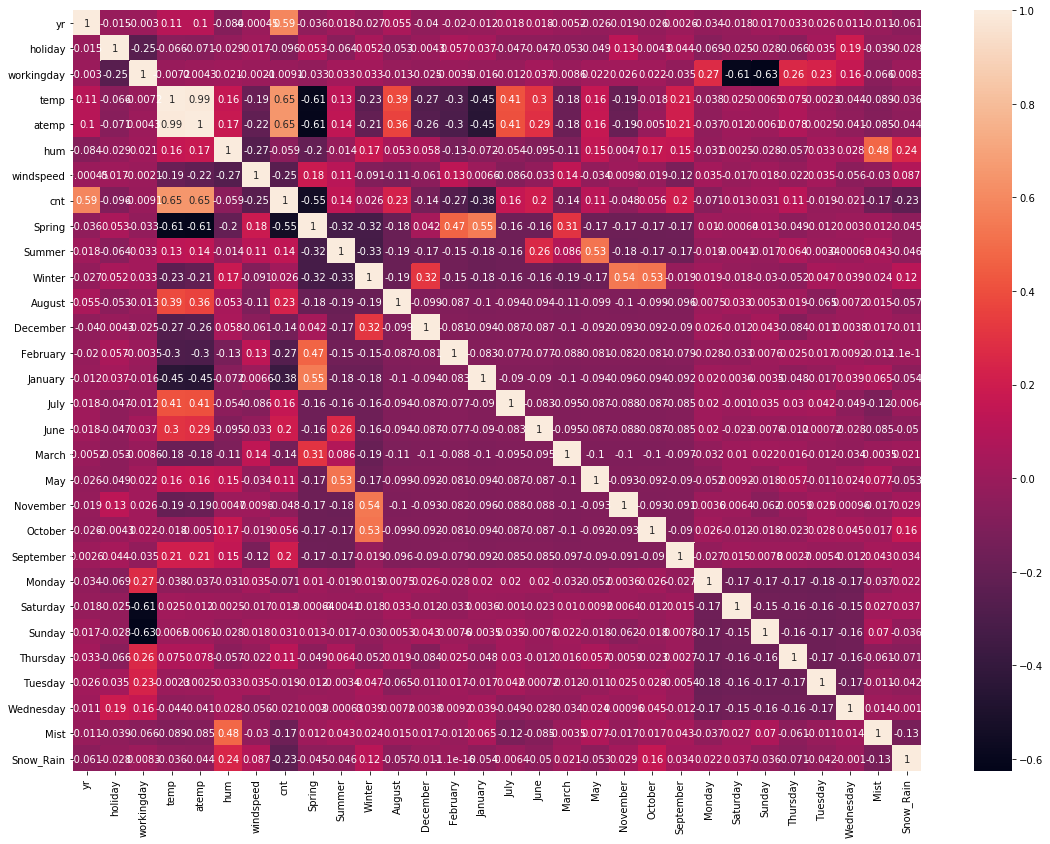

In [23]:
#See correlation
plt.figure(figsize=(19,14))
sns.heatmap(df_train.corr(),annot=True)
plt.show()

In [88]:
# Going by Top down approach. First adding all variables and then will remove based on p value and VIF
# Creating x-train and y-train
y_train=df_train.pop('cnt')
x_train=df_train

In [89]:
x_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'Spring', 'Summer', 'Winter', 'August', 'December', 'February',
       'January', 'July', 'June', 'March', 'May', 'November', 'October',
       'September', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'Mist', 'Snow_Rain'],
      dtype='object')

In [101]:
# Calculate VIF, to compare p-value and VIF for eliminating variables
vif_df=pd.DataFrame()
vif_df['Columns']=x_train.columns
vif_df['VIF']=[variance_inflation_factor(x_train.values,i) for i in range(x_train.shape[1])]
vif_df.sort_values('VIF',ascending=False,inplace=True)
vif_df

,Columns,VIF
2,temp,5.244096
3,windspeed,3.982506
5,Winter,2.630951
0,yr,2.063371
4,Summer,2.038316
10,November,1.820756
6,August,1.627431
14,Mist,1.571551
7,December,1.417298
11,September,1.350631


# Iterations
1. Created first model with all variables and also calculated VIF for all columns. 

# High P value and High VIF
temp And atemp
1. temp and atemp are highly collinear as VIF 441.831063	382.383450 respectively. pvalues are 0.007 and 0.694 resp.
2. Dropping atemp as it is having high p value and high VIF. 
3. After dropping p value decreased and VIF also decreased to 43.
R2: 0.850
Adj R2: 0.841

workingday
1. Dropping working day as having VIF= 63 and p value=0.39
R2: 0.850
Adj R2: 0.842

october
1. dropping october as having high P value=0.864 and VIF=6.31
R2: 0.850
Adj R2: 0.842

Spring
1. dropping spring as having high P value=0.185 and VIF=11.56
R2: 0.849
Adj R2: 0.842

# High P value and Low VIF
Saturday
1. dropping spring as having high P value=0.85 and VIF=1.81
R2: 0.849
Adj R2: 0.842

Thursday
1. dropping spring as having high P value=0.81 and VIF=1.96
R2: 0.849
Adj R2: 0.842

June and July
1. dropping june and july as having high P value=0.60 and 0.66 and VIF=2.4 and 3.6
R2: 0.849
Adj R2: 0.843

March and Sunday
1. dropping March and Sunday as having high P value=0.554 and 0.573 and VIF=1.61 and 1.33
R2: 0.849
Adj R2: 0.843

May and Wednesday
1. dropping May and Wednesday as having high P value=0.259 and 0.275
R2: 0.848
Adj R2: 0.843

# Low P value and High VIF
Hum
1. dropping Hum as having high VIF=25
R2: 0.843
Adj R2: 0.838

## now except for temp which is having VIF 5.2, all are having p values<0.05 and VIF <5
## we will try our model on test data and see performance
Total Predictors: 15

In [91]:
x_train.drop(columns=['atemp'],inplace=True)

In [92]:
x_train.drop(columns=['workingday'],inplace=True)

In [93]:
x_train.drop(columns=['October'],inplace=True)

In [94]:
x_train.drop(columns=['Spring'],inplace=True)

In [95]:
x_train.drop(columns=['Saturday'],inplace=True)

In [96]:
x_train.drop(columns=['Thursday'],inplace=True)

In [97]:
x_train.drop(columns=['June','July'],inplace=True)

In [98]:
x_train.drop(columns=['March','Sunday'],inplace=True)

In [99]:
x_train.drop(columns=['May','Wednesday'],inplace=True)

In [100]:
x_train.drop(columns=['hum'],inplace=True)

In [102]:
#add constant
x_train_sm=sm.add_constant(x_train)

#create model
lr=sm.OLS(y_train,x_train_sm)

#fit the model
lr_model=lr.fit()

##summary of model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     165.0
Date:                Tue, 08 Jun 2021   Prob (F-statistic):          4.15e-186
Time:                        22:43:35   Log-Likelihood:                 510.42
No. Observations:                 510   AIC:                            -986.8
Df Residuals:                     493   BIC:                            -914.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2110      0.025      8.397      0.000       0.162       0.260
yr             0.2341      0.008     28.903      0.000       0.218       0.250
holiday       -0.0910      0.026     -3.509      0.000      -0.142      -0.040
temp           0.4391      0.030     14.789      0.000       0.381       0.497
windspeed     -0.1577      0.025     -6.305      0.000      -0.207      -0.109
Summer         0.0780      0.013      6.215      0.000       0.053       0.103
Winter         0.1315      0.014      9.321      0.000       0.104       0.159
August         0.0454      0.016      2.750      0.006       0.013       0.078
December      -0.0515      0.018     -2.789      0.005      -0.088      -0.015
February      -0.0475      0.021     -2.239      0.026      -0.089      -0.006
January       -0.0776      0.021     -3.650      0.000      -0.119      -0.036
November      -0.0397      0.019     -2.086      0.038      -0.077      -0.002
September      0.1014      0.017      6.118      0.000       0.069       0.134
Monday        -0.0275      0.011     -2.427      0.016      -0.050      -0.005
Tuesday       -0.0318      0.011     -2.790      0.005      -0.054      -0.009
Mist          -0.0817      0.009     -9.435      0.000      -0.099      -0.065
Snow_Rain     -0.2935      0.024    -12.005      0.000      -0.342      -0.245
==============================================================================
Omnibus:                       69.901   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.005
Skew:                          -0.717   Prob(JB):                     5.44e-37
Kurtosis:                       5.409   Cond. No.                         16.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

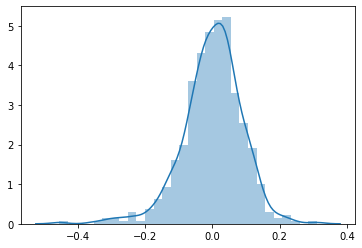

In [103]:
#Validating Assumptions of Linear Regression

# Residual Analysis
y_train_pred=lr_model.predict(x_train_sm)
residual=y_train-y_train_pred
sns.distplot(residual)

# we can observe that the errors are normally distributed around 0

Text(0, 0.5, 'residuals')

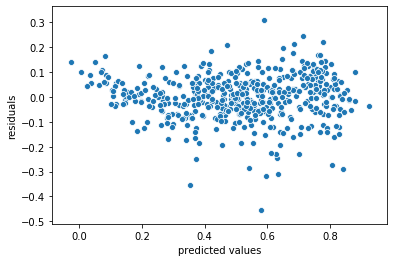

In [104]:
# CHeck homoscedasticity
sns.scatterplot(y_train_pred,residual)
plt.xlabel('predicted values')
plt.ylabel('residuals')

# as variance is similar, and there are no such patterns appearing, so they are homoscedastic.

In [105]:
# Prediction on test data, first we do same transformation
var1=['temp','atemp','hum','windspeed','cnt']
df_test[var1]=scaler.transform(df_test[var1])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Mist,Snow_Rain
184,0,1,0,0.831662,0.769756,0.657358,0.084376,0.692706,0,0,...,0,0,0,0,0,0,0,1,1,0
535,1,0,1,0.901246,0.842741,0.610161,0.153994,0.712034,0,1,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.512002,0.496193,0.837696,0.334296,0.303382,0,0,...,1,0,0,1,0,0,0,0,1,0
221,0,0,1,0.881495,0.795484,0.437139,0.339750,0.547400,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817381,0.741664,0.314303,0.537376,0.569029,0,1,...,0,0,0,1,0,0,0,0,0,0


In [106]:
# Creating x-test and y-test
y_test=df_test.pop('cnt')
x_test=df_test

In [107]:
#add constant
x_test_sm=sm.add_constant(x_test)

#drop columns which are not part of model
x_test_sm.drop(columns=['atemp','workingday','October','Spring','Saturday','Thursday','June'
                        ,'July','March','Sunday','May','Wednesday','hum'],inplace=True)


In [108]:
# Predict on test data
y_test_pred=lr_model.predict(x_test_sm)

In [109]:
# CHeck R2 and test
r2_score(y_true=y_test,y_pred=y_test_pred)

0.8106896925262798

## 
As the R squared value is 0.81, which is close to that of the train R squared of 0.84, the results look good for new data
We also tried removing temp from the model(as VIF just over 5) but the R2/adj R2 drops to around 0.76 
hence decided to keep it as part of model.